# Experiment 7 - look at accuracies and PS as a function of number of practiced tasks trained

In [145]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from model import analysis
from model import task
from importlib import reload
import tools
import pandas as pd
analysis = reload(analysis)
sns.set_style("whitegrid")

In [146]:
datadir = '../../data/results/experiment7/'

# Load data

In [147]:
nsimulations = 20

# df_sgd = pd.read_csv(datadir + 'expt5_sgd_150epochs_2layers_pretraining_posneg_practice_simData0.csv')
# df_sgd.insert(len(df_sgd.columns),"Simulation",list(np.repeat(0,len(df_sgd))),True)
#
df_adam = pd.read_csv(datadir + 'expt7_adam_200epochs_2layers_2rulepretraining_practice_simData0.csv')
df_adam.insert(len(df_adam.columns),"Simulation",list(np.repeat(0,len(df_adam))),True)
#
df_adam_1rule = pd.read_csv(datadir + 'expt7_adam_200epochs_2layers_pretraining_practice_simData0.csv')
df_adam_1rule.insert(len(df_adam_1rule.columns),"Simulation",list(np.repeat(0,len(df_adam_1rule))),True)
#
df_adam_nopretraining = pd.read_csv(datadir + 'expt7_adam_200epochs_2layers_practice_simData0.csv')
df_adam_nopretraining.insert(len(df_adam_nopretraining.columns),"Simulation",list(np.repeat(0,len(df_adam_nopretraining))),True)

for i in range(1,nsimulations):
#     tmp = pd.read_csv(datadir + 'expt5_sgd_150epochs_2layers_pretraining_posneg_practice_simData' + str(i) + '.csv')
#     tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
#     df_sgd = df_sgd.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt7_adam_200epochs_2layers_2rulepretraining_practice_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam = df_adam.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt7_adam_200epochs_2layers_pretraining_practice_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam_1rule = df_adam_1rule.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt7_adam_200epochs_2layers_practice_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam_nopretraining = df_adam_nopretraining.append(tmp)



## Accuracy vs. number of practiced tasks

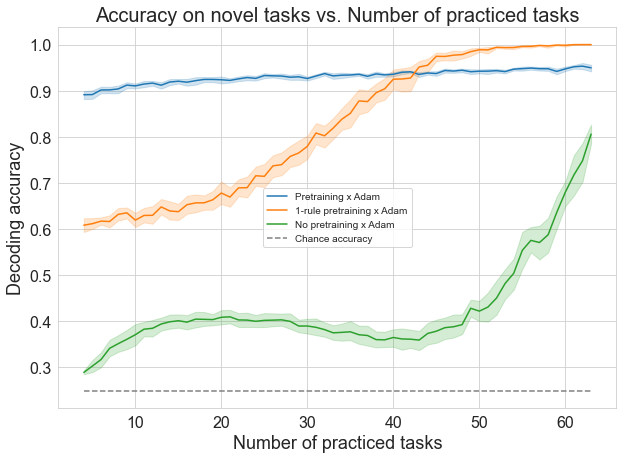

In [148]:
# prac_acc = df.loc[df['Condition']=='Practiced']
# rule2_acc = df.loc[df['Condition']=='2-rule overlap']
# rule1_acc = df.loc[df['Condition']=='1-rule overlap']
plt.figure(figsize=(10,7))
# sns.lineplot(x="NumPracticedTasks",y="Accuracy",data=df_sgd,label='Pretraining x SGD')
sns.lineplot(x="NumPracticedTasks",y="Accuracy",data=df_adam,label='Pretraining x Adam')
sns.lineplot(x="NumPracticedTasks",y="Accuracy",data=df_adam_1rule,label='1-rule pretraining x Adam')
sns.lineplot(x="NumPracticedTasks",y="Accuracy",data=df_adam_nopretraining,label='No pretraining x Adam')
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy on novel tasks vs. Number of practiced tasks', fontsize=20)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylabel('Decoding accuracy', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.legend()

# PS analysis

#### PS: Logic rule

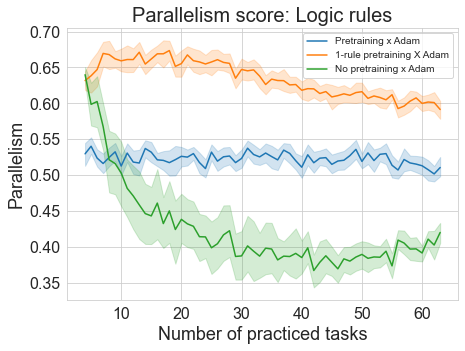

In [149]:
# prac_acc = df.loc[df['Condition']=='Practiced']
# rule2_acc = df.loc[df['Condition']=='2-rule overlap']
# rule1_acc = df.loc[df['Condition']=='1-rule overlap']
plt.figure(figsize=(7,5))
# sns.lineplot(x="NumPracticedTasks",y="LogicPS2",data=df_sgd,label='Pretraining x SGD')
sns.lineplot(x="NumPracticedTasks",y="LogicPS2",data=df_adam,label='Pretraining x Adam')
sns.lineplot(x="NumPracticedTasks",y="LogicPS2",data=df_adam_1rule,label='1-rule pretraining X Adam')
sns.lineplot(x="NumPracticedTasks",y="LogicPS2",data=df_adam_nopretraining,label='No pretraining x Adam')
plt.title('Parallelism score: Logic rules', fontsize=20)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylabel('Parallelism', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

#### Sensory PS

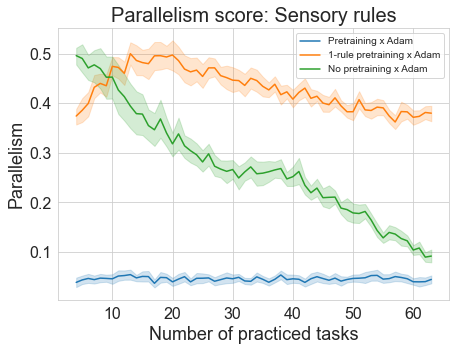

In [150]:
# prac_acc = df.loc[df['Condition']=='Practiced']
# rule2_acc = df.loc[df['Condition']=='2-rule overlap']
# rule1_acc = df.loc[df['Condition']=='1-rule overlap']
plt.figure(figsize=(7,5))
# sns.lineplot(x="NumPracticedTasks",y="SensoryPS2",data=df_sgd,label='Pretraining x SGD')
sns.lineplot(x="NumPracticedTasks",y="SensoryPS2",data=df_adam,label='Pretraining x Adam')
sns.lineplot(x="NumPracticedTasks",y="SensoryPS2",data=df_adam_1rule,label='1-rule pretraining x Adam')
sns.lineplot(x="NumPracticedTasks",y="SensoryPS2",data=df_adam_nopretraining,label='No pretraining x Adam')
plt.title('Parallelism score: Sensory rules', fontsize=20)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylabel('Parallelism', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

#### Motor PS

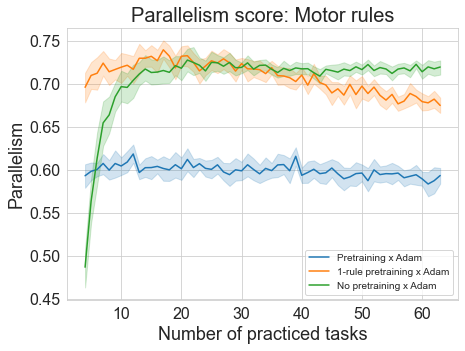

In [151]:
# prac_acc = df.loc[df['Condition']=='Practiced']
# rule2_acc = df.loc[df['Condition']=='2-rule overlap']
# rule1_acc = df.loc[df['Condition']=='1-rule overlap']
plt.figure(figsize=(7,5))
# sns.lineplot(x="NumPracticedTasks",y="MotorPS2",data=df_sgd,label='Pretraining x SGD')
sns.lineplot(x="NumPracticedTasks",y="MotorPS2",data=df_adam,label='Pretraining x Adam')
sns.lineplot(x="NumPracticedTasks",y="MotorPS2",data=df_adam_1rule,label='1-rule pretraining x Adam')
sns.lineplot(x="NumPracticedTasks",y="MotorPS2",data=df_adam_nopretraining,label='No pretraining x Adam')
plt.title('Parallelism score: Motor rules', fontsize=20)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylabel('Parallelism', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

#### Average PS across all domains

In [152]:
df_psavg = {}
df_psavg['PS1'] = []
df_psavg['PS2'] = []
df_psavg['PSavg'] = []
df_psavg['Simulation'] = []
df_psavg['NumPracticedTasks'] = []
df_psavg['Accuracy'] = []
df_psavg['Training'] = []
for i in range(0,nsimulations):
    tmpdf = df_adam.loc[df_adam.Simulation==i]
    df_psavg['Simulation'].extend(np.repeat(i,len(tmpdf)))
    avgps1 = (tmpdf.LogicPS1.values + tmpdf.SensoryPS1.values + tmpdf.MotorPS1.values)/3.0
    df_psavg['PS1'].extend(avgps1)
    avgps2 = (tmpdf.LogicPS2.values + tmpdf.SensoryPS2.values + tmpdf.MotorPS2.values)/3.0
    df_psavg['PS2'].extend(avgps2)
    df_psavg['PSavg'].extend((avgps1+avgps2)/2.0)
    df_psavg['NumPracticedTasks'].extend(tmpdf.NumPracticedTasks.values)
    df_psavg['Accuracy'].extend(tmpdf.Accuracy.values)
    df_psavg['Training'].extend(np.repeat('Adam 2-rule pretraining',len(tmpdf)))

    
    tmpdf = df_adam_nopretraining.loc[df_adam_nopretraining.Simulation==i]
    df_psavg['Simulation'].extend(np.repeat(i,len(tmpdf)))
    avgps1 = (tmpdf.LogicPS1.values + tmpdf.SensoryPS1.values + tmpdf.MotorPS1.values)/3.0
    df_psavg['PS1'].extend(avgps1)
    avgps2 = (tmpdf.LogicPS2.values + tmpdf.SensoryPS2.values + tmpdf.MotorPS2.values)/3.0
    df_psavg['PS2'].extend(avgps2)
    df_psavg['PSavg'].extend((avgps1+avgps2)/2.0)
    df_psavg['NumPracticedTasks'].extend(tmpdf.NumPracticedTasks.values)
    df_psavg['Accuracy'].extend(tmpdf.Accuracy.values)
    df_psavg['Training'].extend(np.repeat('Adam no pretraining',len(tmpdf)))
    
    tmpdf = df_adam_1rule.loc[df_adam_1rule.Simulation==i]
    df_psavg['Simulation'].extend(np.repeat(i,len(tmpdf)))
    avgps1 = (tmpdf.LogicPS1.values + tmpdf.SensoryPS1.values + tmpdf.MotorPS1.values)/3.0
    df_psavg['PS1'].extend(avgps1)
    avgps2 = (tmpdf.LogicPS2.values + tmpdf.SensoryPS2.values + tmpdf.MotorPS2.values)/3.0
    df_psavg['PS2'].extend(avgps2)
    df_psavg['PSavg'].extend((avgps1+avgps2)/2.0)
    df_psavg['NumPracticedTasks'].extend(tmpdf.NumPracticedTasks.values)
    df_psavg['Accuracy'].extend(tmpdf.Accuracy.values)
    df_psavg['Training'].extend(np.repeat('Adam 1-rule pretraining',len(tmpdf)))

df_psavg = pd.DataFrame(df_psavg)

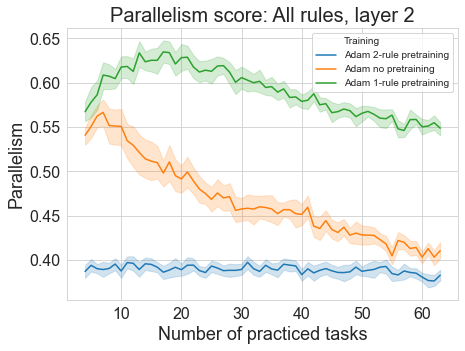

In [153]:
plt.figure(figsize=(7,5))
sns.lineplot(x="NumPracticedTasks",y="PS2",hue='Training',data=df_psavg)
plt.title('Parallelism score: All rules, layer 2', fontsize=20)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylabel('Parallelism', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

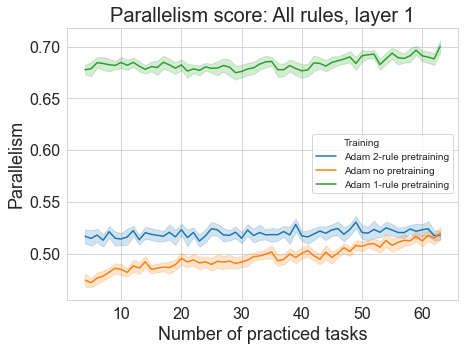

In [154]:
plt.figure(figsize=(7,5))
sns.lineplot(x="NumPracticedTasks",y="PS1",hue='Training',data=df_psavg)
plt.title('Parallelism score: All rules, layer 1', fontsize=20)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylabel('Parallelism', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

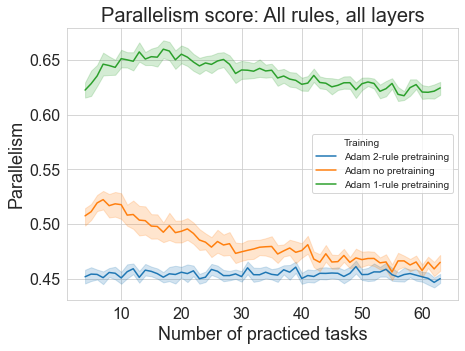

In [155]:
plt.figure(figsize=(7,5))
sns.lineplot(x="NumPracticedTasks",y="PSavg",hue='Training',data=df_psavg)
plt.title('Parallelism score: All rules, all layers', fontsize=20)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylabel('Parallelism', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

# Compare accuracy x PS scores

In [156]:
df_adam0 = pd.read_csv(datadir + 'expt7_adam_zeroshot_2layers_2rulepretraining_simData0.csv')
df_adam0.insert(len(df_adam0.columns),"Simulation",list(np.repeat(0,len(df_adam0))),True)
#
df_adam0_1rule = pd.read_csv(datadir + 'expt7_adam_zeroshot_2layers_pretraining_simData0.csv')
df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Simulation",list(np.repeat(0,len(df_adam0_1rule))),True)
#
df_adam0_nopretraining = pd.read_csv(datadir + 'expt7_adam_zeroshot_2layers_simData0.csv')
df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Simulation",list(np.repeat(0,len(df_adam0_nopretraining))),True)

for i in range(1,nsimulations):
    #
    tmp = pd.read_csv(datadir + 'expt7_adam_zeroshot_2layers_2rulepretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam0 = df_adam0.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt7_adam_zeroshot_2layers_pretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam0_1rule = df_adam0_1rule.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt7_adam_zeroshot_2layers_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam0_nopretraining = df_adam0_nopretraining.append(tmp)

In [157]:
df_psavg0 = {}
df_psavg0['PS1'] = []
df_psavg0['PS2'] = []
df_psavg0['PSavg'] = []
df_psavg0['Simulation'] = []
df_psavg0['NumPracticedTasks'] = []
df_psavg0['Accuracy'] = []
df_psavg0['Training'] = []
for i in range(0,nsimulations):
    # Get 0 practiced tasks data
    tmpdf = df_adam0.loc[df_adam0.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==0]
    df_psavg0['Simulation'].extend(np.repeat(i,len(tmpdf)))
    avgps1 = (tmpdf.LogicPS1.values + tmpdf.SensoryPS1.values + tmpdf.MotorPS1.values)/3.0
    df_psavg0['PS1'].extend(avgps1)
    avgps2 = (tmpdf.LogicPS2.values + tmpdf.SensoryPS2.values + tmpdf.MotorPS2.values)/3.0
    df_psavg0['PS2'].extend(avgps2)
    df_psavg0['PSavg'].extend((avgps1+avgps2)/2.0)
    df_psavg0['NumPracticedTasks'].extend(tmpdf.NumPracticedTasks.values)
    df_psavg0['Accuracy'].extend(tmpdf.Accuracy.values*100.0)
    df_psavg0['Training'].extend(np.repeat('Compositional pretraining',len(tmpdf)))
    
    tmpdf = df_adam0_1rule.loc[df_adam0_1rule.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==0]
    df_psavg0['Simulation'].extend(np.repeat(i,len(tmpdf)))
    avgps1 = (tmpdf.LogicPS1.values + tmpdf.SensoryPS1.values + tmpdf.MotorPS1.values)/3.0
    df_psavg0['PS1'].extend(avgps1)
    avgps2 = (tmpdf.LogicPS2.values + tmpdf.SensoryPS2.values + tmpdf.MotorPS2.values)/3.0
    df_psavg0['PS2'].extend(avgps2)
    df_psavg0['PSavg'].extend((avgps1+avgps2)/2.0)
    df_psavg0['NumPracticedTasks'].extend(tmpdf.NumPracticedTasks.values)
    df_psavg0['Accuracy'].extend(tmpdf.Accuracy.values*100.0)
    df_psavg0['Training'].extend(np.repeat('1-rule pretraining',len(tmpdf)))
    
    
    tmpdf = df_adam0_nopretraining.loc[df_adam0_nopretraining.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==0]
    df_psavg0['Simulation'].extend(np.repeat(i,len(tmpdf)))
    avgps1 = (tmpdf.LogicPS1.values + tmpdf.SensoryPS1.values + tmpdf.MotorPS1.values)/3.0
    df_psavg0['PS1'].extend(avgps1)
    avgps2 = (tmpdf.LogicPS2.values + tmpdf.SensoryPS2.values + tmpdf.MotorPS2.values)/3.0
    df_psavg0['PS2'].extend(avgps2)
    df_psavg0['PSavg'].extend((avgps1+avgps2)/2.0)
    df_psavg0['NumPracticedTasks'].extend(tmpdf.NumPracticedTasks.values)
    df_psavg0['Accuracy'].extend(tmpdf.Accuracy.values*100.0)
    df_psavg0['Training'].extend(np.repeat('No pretraining',len(tmpdf)))
    
    #### Get 64 practiced tasks data
    tmpdf = df_adam.loc[df_adam.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==60]
    df_psavg0['Simulation'].extend(np.repeat(i,len(tmpdf)))
    avgps1 = (tmpdf.LogicPS1.values + tmpdf.SensoryPS1.values + tmpdf.MotorPS1.values)/3.0
    df_psavg0['PS1'].extend(avgps1)
    avgps2 = (tmpdf.LogicPS2.values + tmpdf.SensoryPS2.values + tmpdf.MotorPS2.values)/3.0
    df_psavg0['PS2'].extend(avgps2)
    df_psavg0['PSavg'].extend((avgps1+avgps2)/2.0)
    df_psavg0['NumPracticedTasks'].extend(tmpdf.NumPracticedTasks.values)
    df_psavg0['Accuracy'].extend(tmpdf.Accuracy.values*100.0)
    df_psavg0['Training'].extend(np.repeat('Compositional pretraining',len(tmpdf)))


    tmpdf = df_adam_1rule.loc[df_adam_1rule.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==60]
    df_psavg0['Simulation'].extend(np.repeat(i,len(tmpdf)))
    avgps1 = (tmpdf.LogicPS1.values + tmpdf.SensoryPS1.values + tmpdf.MotorPS1.values)/3.0
    df_psavg0['PS1'].extend(avgps1)
    avgps2 = (tmpdf.LogicPS2.values + tmpdf.SensoryPS2.values + tmpdf.MotorPS2.values)/3.0
    df_psavg0['PS2'].extend(avgps2)
    df_psavg0['PSavg'].extend((avgps1+avgps2)/2.0)
    df_psavg0['NumPracticedTasks'].extend(tmpdf.NumPracticedTasks.values)
    df_psavg0['Accuracy'].extend(tmpdf.Accuracy.values*100.0)
    df_psavg0['Training'].extend(np.repeat('1-rule pretraining',len(tmpdf)))
    
    
    tmpdf = df_adam_nopretraining.loc[df_adam_nopretraining.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==60]
    df_psavg0['Simulation'].extend(np.repeat(i,len(tmpdf)))
    avgps1 = (tmpdf.LogicPS1.values + tmpdf.SensoryPS1.values + tmpdf.MotorPS1.values)/3.0
    df_psavg0['PS1'].extend(avgps1)
    avgps2 = (tmpdf.LogicPS2.values + tmpdf.SensoryPS2.values + tmpdf.MotorPS2.values)/3.0
    df_psavg0['PS2'].extend(avgps2)
    df_psavg0['PSavg'].extend((avgps1+avgps2)/2.0)
    df_psavg0['NumPracticedTasks'].extend(tmpdf.NumPracticedTasks.values)
    df_psavg0['Accuracy'].extend(tmpdf.Accuracy.values*100.0)
    df_psavg0['Training'].extend(np.repeat('No pretraining',len(tmpdf)))
    
#     #### Get 64 practiced tasks data
#     tmpdf = df_adam.loc[df_adam.Simulation==i]
#     tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==4]
#     df_psavg0['Simulation'].extend(np.repeat(i,len(tmpdf)))
#     avgps1 = (tmpdf.LogicPS1.values + tmpdf.SensoryPS1.values + tmpdf.MotorPS1.values)/3.0
#     df_psavg0['PS1'].extend(avgps1)
#     avgps2 = (tmpdf.LogicPS2.values + tmpdf.SensoryPS2.values + tmpdf.MotorPS2.values)/3.0
#     df_psavg0['PS2'].extend(avgps2)
#     df_psavg0['PSavg'].extend((avgps1+avgps2)/2.0)
#     df_psavg0['NumPracticedTasks'].extend(tmpdf.NumPracticedTasks.values)
#     df_psavg0['Accuracy'].extend(tmpdf.Accuracy.values)
#     df_psavg0['Training'].extend(np.repeat('Adam',len(tmpdf)))

    
#     tmpdf = df_adam_nopretraining.loc[df_adam_nopretraining.Simulation==i]
#     tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==4]
#     df_psavg0['Simulation'].extend(np.repeat(i,len(tmpdf)))
#     avgps1 = (tmpdf.LogicPS1.values + tmpdf.SensoryPS1.values + tmpdf.MotorPS1.values)/3.0
#     df_psavg0['PS1'].extend(avgps1)
#     avgps2 = (tmpdf.LogicPS2.values + tmpdf.SensoryPS2.values + tmpdf.MotorPS2.values)/3.0
#     df_psavg0['PS2'].extend(avgps2)
#     df_psavg0['PSavg'].extend((avgps1+avgps2)/2.0)
#     df_psavg0['NumPracticedTasks'].extend(tmpdf.NumPracticedTasks.values)
#     df_psavg0['Accuracy'].extend(tmpdf.Accuracy.values)
#     df_psavg0['Training'].extend(np.repeat('Adam no pretraining',len(tmpdf)))

df_psavg0 = pd.DataFrame(df_psavg0)

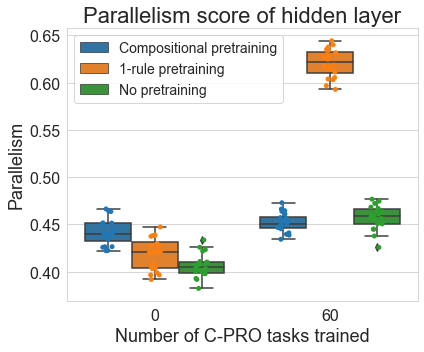

In [159]:
plt.figure(figsize=(6,5))
ax = sns.boxplot(x="NumPracticedTasks",y="PSavg",hue='Training',data=df_psavg0)
sns.stripplot(x="NumPracticedTasks",y="PSavg",hue='Training',dodge=True,data=df_psavg0)
plt.title('Parallelism score of hidden layer', fontsize=22)
plt.xlabel('Number of C-PRO tasks trained', fontsize=18)
plt.ylabel('Parallelism', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
# plt.ylim([0,.5])
plt.legend()
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:3], labels[0:3],fontsize=14)
# plt.ylim([0,.5])
plt.tight_layout()
plt.savefig('ModelPS.png', dpi=300)

In [162]:
tmp =df_psavg0.loc[df_psavg0.NumPracticedTasks==60]
tmp = tmp.loc[tmp.Training=="Compositional pretraining"]

In [163]:
tmp.Accuracy

3      92.773438
9      95.800781
15     93.457031
21     94.531250
27     95.996094
33     95.996094
39     93.652344
45     95.312500
51     93.554688
57     96.093750
63     93.554688
69     96.093750
75     94.335938
81     96.191406
87     94.531250
93     94.824219
99     94.238281
105    95.996094
111    94.238281
117    93.359375
Name: Accuracy, dtype: float64

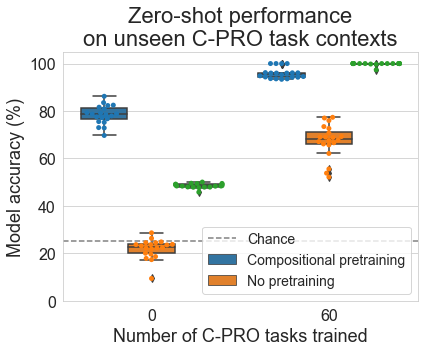

In [136]:
plt.figure(figsize=(6,5))
sns.boxplot(x="NumPracticedTasks",y="Accuracy",hue='Training',data=df_psavg0)
ax = sns.swarmplot(x="NumPracticedTasks",y="Accuracy",hue='Training',data=df_psavg0,dodge=True)
plt.plot(np.arange(-0.5,2.5),np.repeat(25.0,3),'gray',linestyle='--',label='Chance')
plt.title('Zero-shot performance\non unseen C-PRO task contexts', fontsize=22)
plt.xlabel('Number of C-PRO tasks trained', fontsize=18)
plt.ylabel('Model accuracy (%)', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.legend()
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:3], labels[0:3],fontsize=14)
plt.ylim([0,105])
plt.tight_layout()
plt.savefig('ModelPerformance.png', dpi=300)

#### Look at PS for pretrained networks (zero-shot) for each rule separately

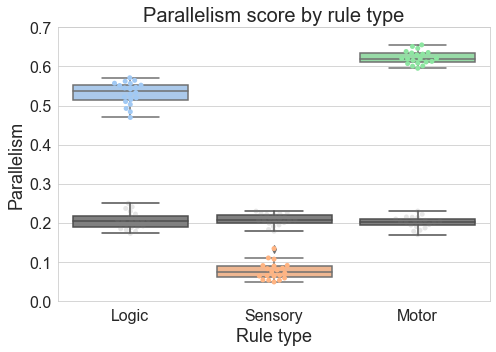

In [251]:
dfrule0 = {}
dfrule0['Parallelism score'] = []
dfrule0['Rule type'] = []
dfrule0['Simulation'] = []
dfrule0_notraining = {}
dfrule0_notraining['Parallelism score'] = []
dfrule0_notraining['Rule type'] = []
dfrule0_notraining['Simulation'] = []
for i in range(0,nsimulations):
    # Get 0 practiced tasks data
    tmpdf = df_adam0.loc[df_adam0.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==0]
    dfrule0['Simulation'].append(i)
    dfrule0['Parallelism score'].append(tmpdf.LogicPS2.values[0])
    dfrule0['Rule type'].append('Logic')
    
    dfrule0['Simulation'].append(i)
    dfrule0['Parallelism score'].append(tmpdf.SensoryPS2.values[0])
    dfrule0['Rule type'].append('Sensory')
    
    dfrule0['Simulation'].append(i)
    dfrule0['Parallelism score'].append(tmpdf.MotorPS2.values[0])
    dfrule0['Rule type'].append('Motor')

    ## No training model
    tmpdf = df_adam0_nopretraining.loc[df_adam0_nopretraining.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==0]
    dfrule0_notraining['Simulation'].append(i)
    dfrule0_notraining['Parallelism score'].append(tmpdf.LogicPS2.values[0])
    dfrule0_notraining['Rule type'].append('Logic')
    
    dfrule0_notraining['Simulation'].append(i)
    dfrule0_notraining['Parallelism score'].append(tmpdf.SensoryPS2.values[0])
    dfrule0_notraining['Rule type'].append('Sensory')
    
    dfrule0_notraining['Simulation'].append(i)
    dfrule0_notraining['Parallelism score'].append(tmpdf.MotorPS2.values[0])
    dfrule0_notraining['Rule type'].append('Motor')
    
dfrule0 = pd.DataFrame(dfrule0)

plt.figure(figsize=(7,5))
sns.boxplot(x="Rule type",y="Parallelism score",data=dfrule0,palette='pastel')
sns.swarmplot(x="Rule type",y="Parallelism score",data=dfrule0,palette='pastel')
sns.boxplot(x="Rule type",y="Parallelism score",data=dfrule0_notraining,palette=['grey','grey','grey'])
sns.swarmplot(x="Rule type",y="Parallelism score",data=dfrule0_notraining,palette=['gray','gray','gray'],alpha=0.2)
plt.title('Parallelism score by rule type', fontsize=20)
plt.xlabel('Rule type', fontsize=18)
plt.ylabel('Parallelism', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.ylim([0,.7])
plt.tight_layout()

___
# By rule analysis? -- Adam x Pretraining

In [34]:
df_sgd = pd.read_csv(datadir + 'expt3_sgd_100epochs_pretraining_practice_PerTaskData0.csv')
df_sgd.insert(len(df_sgd.columns),"Simulation",list(np.repeat(0,len(df_sgd))),True)
#
df_adam = pd.read_csv(datadir + 'expt3_adam_100epochs_pretraining_practice_PerTaskData0.csv')
df_adam.insert(len(df_adam.columns),"Simulation",list(np.repeat(0,len(df_adam))),True)
#
df_sgd_nopretraining = pd.read_csv(datadir + 'expt3_sgd_100epochs_practice_PerTaskData0.csv')
df_sgd_nopretraining.insert(len(df_sgd_nopretraining.columns),"Simulation",list(np.repeat(0,len(df_adam))),True)
#
df_adam_nopretraining = pd.read_csv(datadir + 'expt3_adam_100epochs_practice_PerTaskData0.csv')
df_adam_nopretraining.insert(len(df_adam_nopretraining.columns),"Simulation",list(np.repeat(0,len(df_adam_nopretraining))),True)

for i in range(1,nsimulations):
    tmp = pd.read_csv(datadir + 'expt3_sgd_100epochs_pretraining_practice_PerTaskData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_sgd = df_sgd.append(tmp)
#     #
    tmp = pd.read_csv(datadir + 'expt3_adam_100epochs_pretraining_practice_PerTaskData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam = df_adam.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_sgd_100epochs_practice_PerTaskData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_sgd_nopretraining = df_sgd_nopretraining.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_adam_100epochs_practice_PerTaskData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam_nopretraining = df_adam_nopretraining.append(tmp)

FileNotFoundError: [Errno 2] File ../../data/results/experiment5/expt3_sgd_100epochs_pretraining_practice_PerTaskData0.csv does not exist: '../../data/results/experiment5/expt3_sgd_100epochs_pretraining_practice_PerTaskData0.csv'

In [11]:
df = df_adam
logicrules = ['both','either','neither','notboth']
sensoryrules = ['red','vertical','high','constant']
motorrules = ['l_mid','l_ind','r_mid','r_ind']
df_logic = pd.DataFrame({})
df_sensory = pd.DataFrame({})
df_motor = pd.DataFrame({})
# Extract the accuracy values for each rule (novel tasks only)

tmpdf = df.loc[df.Condition=='Novel'] #

for rule in logicrules:
    df_logic = df_logic.append(tmpdf.loc[tmpdf.Logic==rule])
for rule in sensoryrules:
    df_sensory = df_sensory.append(tmpdf.loc[tmpdf.Sensory==rule])
for rule in motorrules:
    df_motor = df_motor.append(tmpdf.loc[tmpdf.Motor==rule])

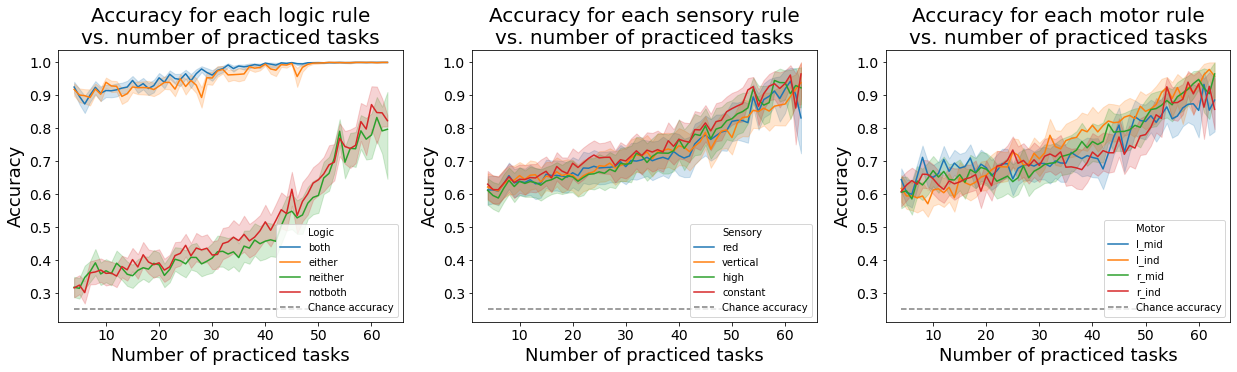

In [12]:
plt.figure(figsize=(21,5))
plt.subplot(131)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Logic",data=df_logic)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each logic rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(132)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Sensory",data=df_sensory)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each sensory rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(133)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Motor",data=df_motor)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each motor rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

___
# By rule analysis? -- SGD x Pretraining

In [13]:
df = df_sgd
logicrules = ['both','either','neither','notboth']
sensoryrules = ['red','vertical','high','constant']
motorrules = ['l_mid','l_ind','r_mid','r_ind']
df_logic = pd.DataFrame({})
df_sensory = pd.DataFrame({})
df_motor = pd.DataFrame({})
# Extract the accuracy values for each rule (novel tasks only)

tmpdf = df.loc[df.Condition=='Novel'] #

for rule in logicrules:
    df_logic = df_logic.append(tmpdf.loc[tmpdf.Logic==rule])
for rule in sensoryrules:
    df_sensory = df_sensory.append(tmpdf.loc[tmpdf.Sensory==rule])
for rule in motorrules:
    df_motor = df_motor.append(tmpdf.loc[tmpdf.Motor==rule])

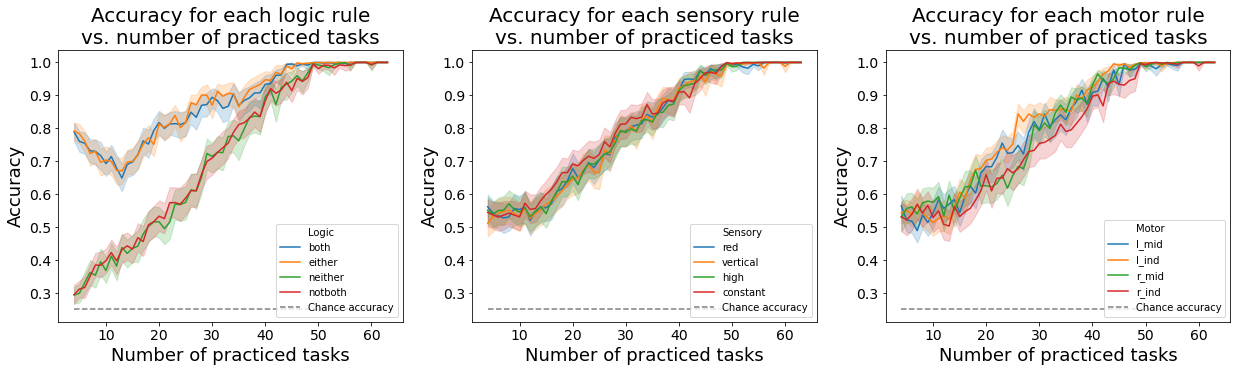

In [14]:
plt.figure(figsize=(21,5))
plt.subplot(131)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Logic",data=df_logic)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each logic rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(132)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Sensory",data=df_sensory)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each sensory rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(133)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Motor",data=df_motor)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each motor rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

___
# By rule analysis? -- SGD x No pretraining

In [15]:
df = df_sgd_nopretraining
logicrules = ['both','either','neither','notboth']
sensoryrules = ['red','vertical','high','constant']
motorrules = ['l_mid','l_ind','r_mid','r_ind']
df_logic = pd.DataFrame({})
df_sensory = pd.DataFrame({})
df_motor = pd.DataFrame({})
# Extract the accuracy values for each rule (novel tasks only)

tmpdf = df.loc[df.Condition=='Novel'] #

for rule in logicrules:
    df_logic = df_logic.append(tmpdf.loc[tmpdf.Logic==rule])
for rule in sensoryrules:
    df_sensory = df_sensory.append(tmpdf.loc[tmpdf.Sensory==rule])
for rule in motorrules:
    df_motor = df_motor.append(tmpdf.loc[tmpdf.Motor==rule])

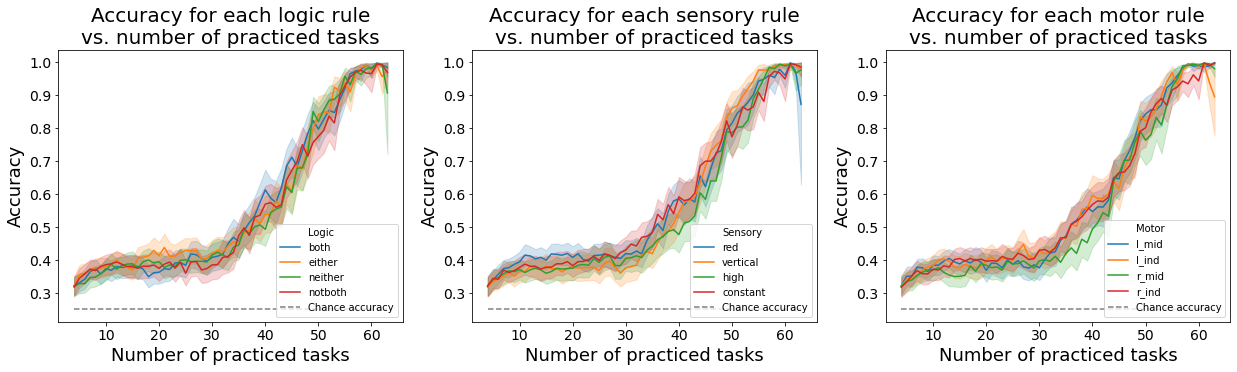

In [16]:
plt.figure(figsize=(21,5))
plt.subplot(131)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Logic",data=df_logic)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each logic rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(132)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Sensory",data=df_sensory)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each sensory rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(133)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Motor",data=df_motor)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each motor rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

___
# By rule analysis? -- Adam x NoPretraining

In [17]:
df = df_adam_nopretraining
logicrules = ['both','either','neither','notboth']
sensoryrules = ['red','vertical','high','constant']
motorrules = ['l_mid','l_ind','r_mid','r_ind']
df_logic = pd.DataFrame({})
df_sensory = pd.DataFrame({})
df_motor = pd.DataFrame({})
# Extract the accuracy values for each rule (novel tasks only)

tmpdf = df.loc[df.Condition=='Novel'] #

for rule in logicrules:
    df_logic = df_logic.append(tmpdf.loc[tmpdf.Logic==rule])
for rule in sensoryrules:
    df_sensory = df_sensory.append(tmpdf.loc[tmpdf.Sensory==rule])
for rule in motorrules:
    df_motor = df_motor.append(tmpdf.loc[tmpdf.Motor==rule])

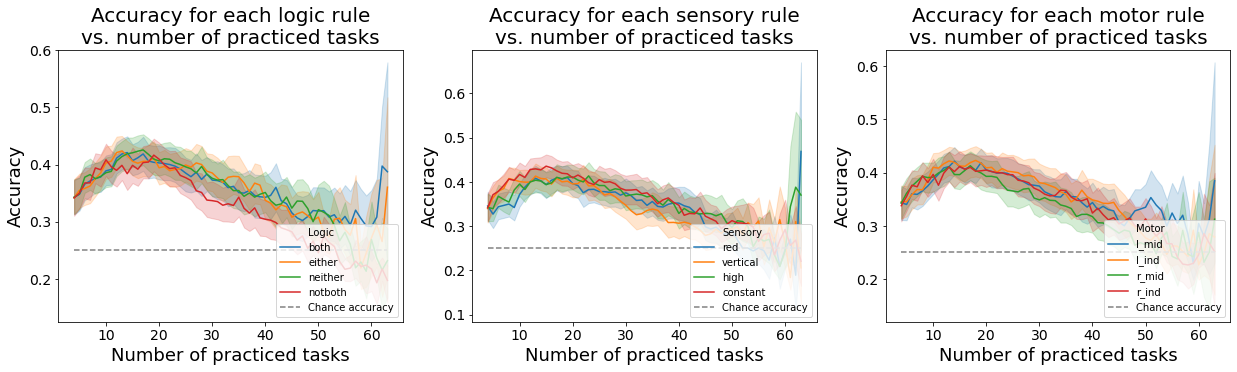

In [18]:
plt.figure(figsize=(21,5))
plt.subplot(131)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Logic",data=df_logic)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each logic rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(132)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Sensory",data=df_sensory)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each sensory rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(133)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Motor",data=df_motor)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy for each motor rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)